In [6]:
import numpy as np 
import pylab as pl 
import seaborn as sns
from gp_functions import *
import george
import os
import pandas as pd
import time
from ggplot import *
%matplotlib inline 


/usr/local/lib/python3.5/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.5/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
sns.set_style("darkgrid", {"axes.facecolor": ".92"})
sns.set_palette(sns.color_palette("husl",8))

In [8]:
root = "../data/"
feature_root = '../features.new/'
allfiles = []
for path, subdirs, files in os.walk(root):
    #subdirs[:] = [d for d in subdirs if d not in ['GBI']]
    for filename in files:
        f = os.path.join(path, filename)
        allfiles.append(f)
    

In [9]:
def get_t0(gp,x,y,err):
    sig = np.mean(err)
    
    t0 = -1
    while t0 == -1:
        xrand = np.random.uniform(np.min(x),np.max(x))
        ytest = gp.sample_conditional(y,xrand)[0]
        if ytest > sig: 
            t0 = xrand 
    return t0

def get_features(gp,x,y,err):
    sec = 1/(24*60*60)
    mins = 1/(24*60)
    hr = 1/24
    day = 1
    week = 7*day
    month = 30*day
    yr = 365*day

    delta_t = np.array([0,2*sec,1*mins,30*mins,1*hr,2*hr,4*hr,6*hr,8*hr,12*hr,1*day,2*day,4*day,6*day,2*week,3*week,1*month,
                        2*month,4*month,6*month,8*month,1*yr,1.5*yr,2*yr])
    
    t0 = get_t0(gp,x,y,err)

    feature_ts = [ (t0 + dt) for dt in delta_t if (t0 + dt) < np.max(x)]
    fluxes = gp.sample_conditional(y,feature_ts)
    
    f0 = fluxes[0]
    feature_vec = [f0 - f for f in fluxes[1:]]
    feature_vec = np.array(feature_vec)
    
    pad_len = len(delta_t) - len(feature_vec)
    feature_vec = np.pad(feature_vec,(0,pad_len),'constant', constant_values=(-999,-999))
    
    return feature_vec


In [250]:
40 + (np.sum(np.char.count(allfiles, 'Magnetic-CV/'))*280)

600

In [11]:
for i in range(len(allfiles)):
    file = allfiles[i]
    
#     if 'Magnetic-CV/' in file:
    x,y,err = loadfile(file)
    gp = get_gp(file) 

    for a in range(100):
        feature_vec = get_features(gp,x,y,err)
        with open(feature_root+file[8:]+'.txt','a+') as f:
            for feature in feature_vec:
                f.write("%5.10f," %feature)
            f.write('\n')

    print(i,file)

0 ../data/TDE/ASASSN-14li.txt
1 ../data/TDE/Swift1644.txt
2 ../data/SN/SN1988z.txt
3 ../data/SN/SN1980K.txt
4 ../data/SN/SN2004dk.txt
5 ../data/SN/SN1998bw.txt
6 ../data/SN/SN2008iz
7 ../data/SN/SN2008ax.txt
8 ../data/SN/SN2003bg.txt
9 ../data/SN/SN2004cc.txt
10 ../data/SN/SN1994I.txt
11 ../data/SN/SN2003L.txt
12 ../data/SN/SN2011dh.txt
13 ../data/SN/SN2004gq.txt
14 ../data/AGN/0528+134p
15 ../data/AGN/3C273
16 ../data/AGN/3C345
17 ../data/AGN/0458-020
18 ../data/AGN/CTA102
19 ../data/AGN/3C279
20 ../data/AGN/NGC4278.txt
21 ../data/AGN/0954+65
22 ../data/AGN/AO0235+164
23 ../data/AGN/3C120
24 ../data/AGN/PKS2004-447.txt
25 ../data/AGN/NRAO530
26 ../data/AGN/1803+784
27 ../data/AGN/B0605-085
28 ../data/AGN/2223-052
29 ../data/AGN/NGC7213
30 ../data/AGN/3C454.3
31 ../data/AGN/GBI/2005+403
32 ../data/AGN/GBI/0850-121
33 ../data/AGN/GBI/0336-019
34 ../data/AGN/GBI/0528+134
35 ../data/AGN/GBI/2200+420
36 ../data/AGN/GBI/1237+049
37 ../data/AGN/GBI/0954+658
38 ../data/AGN/GBI/0851+202
39 ../

In [12]:
feature_root = '../features.new/'
feature_files = []
for path, subdirs, files in os.walk(feature_root):
    #subdirs[:] = [d for d in subdirs if d not in ['GBI']]""""""
    for filename in files:
        f = os.path.join(path, filename)
        feature_files.append(f)

In [13]:
sec = 1/(24*60*60)
mins = 1/(24*60)
hr = 1/24
day = 1
week = 7*day
month = 30*day
yr = 365*day

delta_t = np.array([2*sec,1*mins,30*mins,1*hr,2*hr,4*hr,6*hr,8*hr,12*hr,1*day,2*day,4*day,6*day,2*week,3*week,1*month,
                        2*month,4*month,6*month,8*month,1*yr,1.5*yr,2*yr])
    

In [22]:

feat_cols = ['2sec','1min','30min','1hr','2hr','4hr','6hr','8hr','12hr','1day','2day','4day','6day','2week','3week',
             '1month','2month','4month','6month','8month','1yr','1.5yr','2yr']

df = pd.DataFrame(columns=feat_cols)

metaclass = 'no'

for i in range(len(feature_files)):
    feat_file = feature_files[i]
    df_from_each_file = pd.read_csv(feat_file,sep = ',',names=feat_cols,usecols=np.arange(len(feat_cols)))

    if metaclass == 'yes':
        if 'TDE' in feat_file:
            df_from_each_file['type'] = 'TDE'
            print(feat_file)
        elif 'SN/' in feat_file:
            df_from_each_file['type'] = 'SN'        
        elif 'AGN' in feat_file:
            df_from_each_file['type'] = 'AGN'
        elif 'XRB' in feat_file:
            df_from_each_file['type'] = 'XRB'
        elif 'GRB' in feat_file:
            df_from_each_file['type'] = 'GRB'
        elif 'Nova' in feat_file:
            df_from_each_file['type'] = 'Nova'        
        elif 'RSCVn' in feat_file:
            df_from_each_file['type'] = 'RSCVn'
        elif 'Magnetar' in feat_file:
            df_from_each_file['type'] = 'Magnetar'
        elif 'Flare-Star' in feat_file:
            df_from_each_file['type'] = 'FS'
        elif 'Magnetic-CV' in feat_file:
            df_from_each_file['type'] = 'MCV'
        elif 'Algol' in feat_file:
            df_from_each_file['type'] = 'Algol'
    
    if metaclass == 'no':
        if 'SN/' in feat_file:
            df_from_each_file['type'] = 'SN'        
        elif 'AGN' in feat_file:
            df_from_each_file['type'] = 'AGN'
        elif 'XRB' in feat_file:
            df_from_each_file['type'] = 'XRB'
        elif 'GRB' in feat_file:
            df_from_each_file['type'] = 'GRB'
        elif 'Nova' in feat_file:
            df_from_each_file['type'] = 'Nova'        
        elif 'Flare-Star' in feat_file:
            df_from_each_file['type'] = 'FS'
        elif 'Magnetic-CV' in feat_file:
            df_from_each_file['type'] = 'binary'
        elif 'RSCVn' in feat_file:
            df_from_each_file['type'] = 'binary'
        elif 'Algol' in feat_file:
            df_from_each_file['type'] = 'binary'
            
    df = df.append(df_from_each_file)
        

df = df[feat_cols + ['type']]

df = df.replace(to_replace=-999.0,value=np.nan)
df['type'].value_counts()

AGN       3000
XRB       2000
SN        1200
Nova       700
binary     700
FS         500
GRB        400
Name: type, dtype: int64

In [16]:
feat_array_TDE = df.loc[(df["type"] == "TDE" )]
feat_array_SN = df.loc[(df["type"] == "SN" )]
feat_array_AGN = df.loc[(df["type"] == "AGN" )]
feat_array_XRB = df.loc[(df["type"] == "XRB" )]
feat_array_GRB = df.loc[(df["type"] == "GRB" )]
feat_array_Nova = df.loc[(df["type"] == "Nova" )]
feat_array_RSCVn = df.loc[(df["type"] == "RSCVn" )]
feat_array_Magnetar = df.loc[(df["type"] == "Magnetar" )]
feat_array_FS = df.loc[(df["type"] == "FS" )]
feat_array_MCV = df.loc[(df["type"] == "MCV" )]
feat_array_Algol = df.loc[(df["type"] == "Algol" )]
feat_array_bin = df.loc[(df["type"] == "binary" )]

feat_dfs = [feat_array_TDE,feat_array_SN,feat_array_AGN,feat_array_XRB,feat_array_GRB,
            feat_array_Nova,feat_array_RSCVn,feat_array_Magnetar,feat_array_FS,
            feat_array_MCV,feat_array_Algol,feat_array_bin]

array_names = ['TDE','SN','AGN','XRB','GRB','Nova','RSCVn','Magnetar','FS','MCV','Algol']
dfnew = pd.DataFrame(columns=feat_cols + ['type'])

for d in feat_dfs: 
    d = d.fillna(d.mean())
    dfnew = dfnew.append(d)

dfnew = dfnew.fillna(dfnew.mean())

In [30]:
dfnew[feat_cols[:-10]]
dfnew['type'].value_counts()

binary    1780
AGN        600
XRB        600
FS         600
GRB        600
SN         600
Nova       595
Name: type, dtype: int64

In [19]:

from sklearn.manifold import TSNE
from sklearn import preprocessing

training_set = dfnew[feat_cols[:]].values

scaler = preprocessing.StandardScaler().fit(training_set)
n_sne = 10000

time_start = time.time()
tsne = TSNE(n_components=2,init='pca',verbose=2, perplexity=40)

tsne_results = tsne.fit_transform(scaler.transform(training_set))


print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 8500
[t-SNE] Computed conditional probabilities for sample 2000 / 8500
[t-SNE] Computed conditional probabilities for sample 3000 / 8500
[t-SNE] Computed conditional probabilities for sample 4000 / 8500
[t-SNE] Computed conditional probabilities for sample 5000 / 8500
[t-SNE] Computed conditional probabilities for sample 6000 / 8500
[t-SNE] Computed conditional probabilities for sample 7000 / 8500
[t-SNE] Computed conditional probabilities for sample 8000 / 8500
[t-SNE] Computed conditional probabilities for sample 8500 / 8500
[t-SNE] Mean sigma: 0.000155
[t-SNE] Iteration 25: error = 1.2812904, gradient norm = 0.0048084
[t-SNE] Iteration 50: error = 1.2666837, gradient norm = 0.0040494
[t-SNE] Iteration 75: error = 1.1878595, gradient norm = 0.0034401
[t-SNE] Iteration 100: error = 1.1632441, gradient norm = 0.0038559
[t-SNE] KL divergence aft

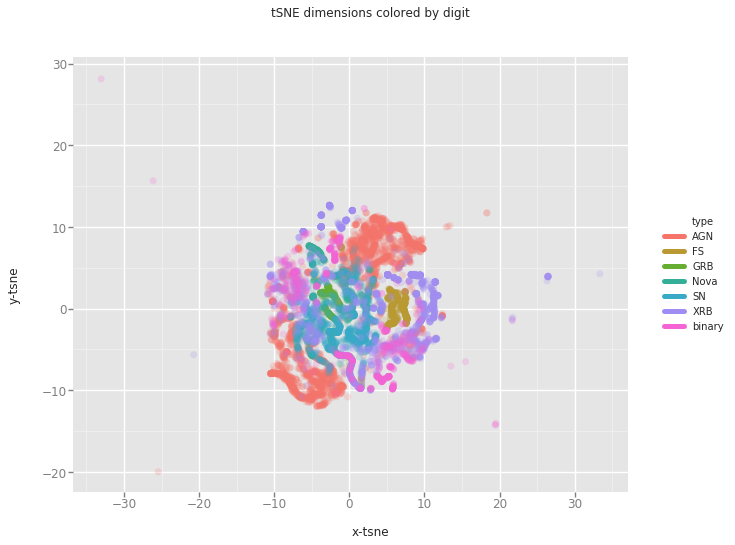

In [20]:
df_tsne = dfnew.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='type') ) \
        + geom_point(size=50,alpha=0.2) \
        + ggtitle("tSNE dimensions colored by digit")
chart.save('tsne_new.png')